In [8]:
import pandas as pd
import matplotlib.pyplot as plt

beer_consumption = pd.read_csv("beer_consuption.csv")



In [23]:
estatisticas = beer_consumption.describe()
estatisticas

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


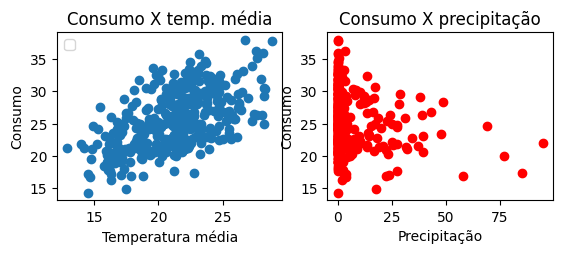

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7e9a84de50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7e9a929520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7e9a873520>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7e9aaba2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e9aae4a00>,
 'means': []}

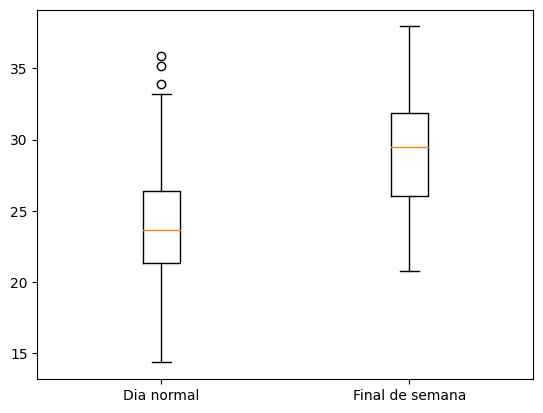

In [21]:
plt.subplot(2, 2, 1)
plt.scatter(beer_consumption["Temperatura Media (C)"], beer_consumption["Consumo de cerveja (litros)"])
plt.xlabel("Temperatura média")
plt.ylabel("Consumo")
plt.title("Consumo X temp. média")
plt.legend()

plt.subplot(2,2, 2)
plt.scatter(beer_consumption["Precipitacao (mm)"], beer_consumption["Consumo de cerveja (litros)"], color="#FF0000")
plt.xlabel("Precipitação")
plt.ylabel("Consumo")
plt.title("Consumo X precipitação")
plt.show()

plt.boxplot(
    [
        beer_consumption[beer_consumption["Final de Semana"] == 0]["Consumo de cerveja (litros)"], 
        beer_consumption[beer_consumption["Final de Semana"] == 1]["Consumo de cerveja (litros)"]
    ],
    labels=["Dia normal", "Final de semana"]
            )
